Лабораторная №4


In [2]:
# загрузим данные и преобазуем их
# обоснование преобразования см лаба 1-2

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
data = pd.read_csv('zoo.csv'  , sep=',')
# Посмотрим на несколько записей из набора данных
data.head(2)


,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1


In [3]:
# преобразование данных

data = data.drop(['class_type', 'catsize'], axis='columns') # первый аргумент - список ненужных признаков,

#Удалим из выборки признаки, высоко коррелирующие с другими признаками 
data = data.drop(['airborne', 'aquatic', 'fins', 'eggs'], axis='columns')

#У нас одна текстовая колонка с названием животного. Для нашей задачи бинарной классификации:
#"Имеет ли животное шерсть?" название животного роли не играет, поэтому эту колонку тоже удаляем.
data = data.drop(['animal_name'], axis='columns')


In [4]:
X = data[data.columns[1:]]
y = data['hair']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)


# нормализация
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

X_test_scaled.head(2)


,feathers,milk,predator,toothed,backbone,breathes,venomous,legs,tail,domestic
0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.333333,0.0,0.0
1,0.0,1.0,1.0,1.0,1.0,1.0,0.0,0.666667,1.0,0.0


In [5]:
# импорт модулей

import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import pylab as plt
import seaborn as sns
from matplotlib import pyplot as plt



In [6]:
# оценка recall одного дерева:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=15)
clf_tree.fit(X_train, y_train)
predicted = clf_tree.predict(X_test)
rec_score = recall_score(y_test, predicted)
print('recall_score:', rec_score)

recall_score: 0.9285714285714286


In [7]:
import os
if os.name == 'mac':
    !xcode-select --install
    !/usr/bin/ruby -e "$(curl -fsSL https://raw.githubusercontent.com/Homebrew/install/master/install)"
    !brew install graphviz

!pip install graphviz
if os.name == 'nt':
    os.environ['PATH'] += os.pathsep + 'C:/Program Files/Graphviz/bin'

!pip install pydotplus

You should consider upgrading via the 'd:\python38\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'd:\python38\python.exe -m pip install --upgrade pip' command.


In [9]:
# визуализация дерева

from ipywidgets import Image
from io import StringIO
import pydotplus
from sklearn.tree import export_graphviz

animals_feature = ['feathers','milk','predator','toothed','backbone','breathes', 'venomous','legs', 'tail' ,'domestic']

dot_data = StringIO()
export_graphviz(clf_tree, feature_names=animals_feature,
               out_file=dot_data, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())


Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02\xc1\x00\x00\x02|\x08\x02\x00\x00\x00\x90\x87\xeb…

Самый важный признак milk. данный узел уменьшает энтропию больше всех. Находится выше всех. Еще важный признак - legs.


In [11]:
# оценка recall одного дерева:

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import recall_score

clf_tree = DecisionTreeClassifier(criterion='entropy', max_depth=2)  
clf_tree.fit(X_train, y_train)
predicted = clf_tree.predict(X_test)
rec_score = recall_score(y_test, predicted)
print('recall_score:', rec_score)

recall_score: 0.8571428571428571


In [12]:
animals_feature = ['feathers','milk','predator','toothed','backbone','breathes', 'venomous','legs', 'tail' ,'domestic']

dot_data = StringIO()
export_graphviz(clf_tree, feature_names=animals_feature,
               out_file=dot_data, filled=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x02s\x00\x00\x01g\x08\x06\x00\x00\x00\xcd\x1f\xcf\x1…

Нестабильность дерева: дерево заметно меняется при измении, например, глубины дерева.
С глубиной=5 Recall=0.9285714285714286
С глубиной=2 Recall=0.8571428571428571
В 3 лабораторной веса milk =  0.39391749, legs = 0.06114613. Они также являлись максимальными среди других. Значит всё отлично!


# Случайный лес

In [13]:
# обычный результат 

from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators=20, max_depth=3).fit(X_train, y_train)

predicted_rf = rf.predict(X_test)

recall_score_rand_forest = recall_score(y_test, predicted_rf)

print('score:', recall_score_rand_forest)

score: 0.9285714285714286


In [30]:
# кросс-валидация

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

rf = RandomForestClassifier(n_estimators=5, max_depth=5)

score_cross_val = cross_val_score(rf, X, y, cv=5, scoring='recall')
print('score:', score_cross_val)

score: [1.         1.         0.77777778 0.875      0.75      ]


Значимые параметры с помощью случайного леса:

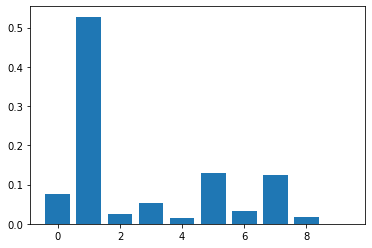

,feature,importance
1,milk,0.527809
5,breathes,0.128226
7,legs,0.124544
0,feathers,0.075347
3,toothed,0.053925


In [22]:
fi = pd.DataFrame({'feature': list(X_train.columns),
                   'importance': rf.feature_importances_}).\
                    sort_values('importance', ascending = False)

# Выводим значения
plt.bar(range(len(rf.feature_importances_)), rf.feature_importances_)
plt.show()
fi.head()

Cамый значимый параметр "молоко"

In [23]:
# подберем лучшие гиперпараметры

recall_score_rand_forest_max = -1

for n_estimators_iter in range(1, 100, 10):
    for depth_iter in  range(2, 8):
        rf = RandomForestClassifier(n_estimators=n_estimators_iter, max_depth=depth_iter).fit(X_train, y_train)
        predicted_rf = rf.predict(X_test)
        recall_score_rand_forest_find = recall_score(y_test, predicted_rf)
        if recall_score_rand_forest_max < recall_score_rand_forest_find:
            recall_score_rand_forest_max = recall_score_rand_forest_find
            print(n_estimators_iter, '   ', depth_iter)  
print('recall_score_rand_forest_max:', recall_score_rand_forest_max)

1     2
1     6
recall_score_rand_forest_max: 0.9285714285714286


Сравним леса и градиентный бустинг

In [28]:
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from catboost import CatBoostClassifier
import lightgbm as ltb

max_score_BoostClassifier = -1

scores1 = np.ndarray([10, 10])
for i, iterations_count in enumerate(np.linspace(20, 120, 10)): 
    for j, depth in enumerate(np.arange(2, 12)):    
        model = CatBoostClassifier(n_estimators=None, max_depth=depth, iterations=int(iterations_count))
        model.fit(X_train, y_train)     #task_type="CPU"
        p = model.predict(X_test)
        score = recall_score(y_test, p)
        scores1[i, j] = score
        if max_score_BoostClassifier < score:
            max_score_BoostClassifier = score
        print('score:', scores1[i, j], '\t iterations_count:', int(iterations_count), '\t depth:', depth, '\n')

print('max_score:', max_score_BoostClassifier)

Learning rate set to 0.12318
0:	learn: 0.6305449	total: 147ms	remaining: 2.79s
1:	learn: 0.5738189	total: 148ms	remaining: 1.33s
2:	learn: 0.5224128	total: 149ms	remaining: 845ms
3:	learn: 0.4844624	total: 150ms	remaining: 600ms
4:	learn: 0.4474088	total: 151ms	remaining: 452ms
5:	learn: 0.4146827	total: 151ms	remaining: 353ms
6:	learn: 0.4007787	total: 152ms	remaining: 283ms
7:	learn: 0.3770041	total: 153ms	remaining: 230ms
8:	learn: 0.3570089	total: 154ms	remaining: 189ms
9:	learn: 0.3353892	total: 156ms	remaining: 156ms
10:	learn: 0.3160004	total: 158ms	remaining: 129ms
11:	learn: 0.3021568	total: 158ms	remaining: 106ms
12:	learn: 0.2941582	total: 159ms	remaining: 85.7ms
13:	learn: 0.2804095	total: 160ms	remaining: 68.5ms
14:	learn: 0.2682894	total: 161ms	remaining: 53.6ms
15:	learn: 0.2562008	total: 162ms	remaining: 40.4ms
16:	learn: 0.2466758	total: 163ms	remaining: 28.7ms
17:	learn: 0.2394039	total: 164ms	remaining: 18.2ms
18:	learn: 0.2310183	total: 164ms	remaining: 8.65ms
19:	l

17:	learn: 0.2526134	total: 39.1ms	remaining: 4.34ms
18:	learn: 0.2438554	total: 40.7ms	remaining: 2.14ms
19:	learn: 0.2360909	total: 42.2ms	remaining: 0us
score: 0.8571428571428571 	 iterations_count: 20 	 depth: 9 

Learning rate set to 0.12318
0:	learn: 0.6305449	total: 626us	remaining: 11.9ms
1:	learn: 0.5780645	total: 1.2ms	remaining: 10.8ms
2:	learn: 0.5328352	total: 1.88ms	remaining: 10.7ms
3:	learn: 0.4958685	total: 2.77ms	remaining: 11.1ms
4:	learn: 0.4690952	total: 3.84ms	remaining: 11.5ms
5:	learn: 0.4451791	total: 4.95ms	remaining: 11.6ms
6:	learn: 0.4181318	total: 5.89ms	remaining: 10.9ms
7:	learn: 0.3941613	total: 6.87ms	remaining: 10.3ms
8:	learn: 0.3720426	total: 7.36ms	remaining: 8.99ms
9:	learn: 0.3528146	total: 8.63ms	remaining: 8.63ms
10:	learn: 0.3341750	total: 9.74ms	remaining: 7.97ms
11:	learn: 0.3168956	total: 11.4ms	remaining: 7.6ms
12:	learn: 0.3037765	total: 12.4ms	remaining: 6.67ms
13:	learn: 0.2904329	total: 13.5ms	remaining: 5.78ms
14:	learn: 0.2795483	tot

score: 0.8571428571428571 	 iterations_count: 31 	 depth: 5 

Learning rate set to 0.082415
0:	learn: 0.6506330	total: 1.12ms	remaining: 33.6ms
1:	learn: 0.6128330	total: 1.74ms	remaining: 25.2ms
2:	learn: 0.5787456	total: 3.31ms	remaining: 30.9ms
3:	learn: 0.5497561	total: 4.21ms	remaining: 28.4ms
4:	learn: 0.5279240	total: 6.06ms	remaining: 31.5ms
5:	learn: 0.5080938	total: 7.08ms	remaining: 29.5ms
6:	learn: 0.4849609	total: 8.18ms	remaining: 28.1ms
7:	learn: 0.4638482	total: 10.3ms	remaining: 29.7ms
8:	learn: 0.4431484	total: 11.6ms	remaining: 28.2ms
9:	learn: 0.4251789	total: 12.5ms	remaining: 26.2ms
10:	learn: 0.4068461	total: 13.6ms	remaining: 24.8ms
11:	learn: 0.3934468	total: 16.3ms	remaining: 25.8ms
12:	learn: 0.3798495	total: 17.7ms	remaining: 24.5ms
13:	learn: 0.3659885	total: 18.8ms	remaining: 22.9ms
14:	learn: 0.3542042	total: 19.9ms	remaining: 21.2ms
15:	learn: 0.3416802	total: 23.3ms	remaining: 21.8ms
16:	learn: 0.3311913	total: 25.5ms	remaining: 21ms
17:	learn: 0.322280

score: 0.8571428571428571 	 iterations_count: 31 	 depth: 10 

Learning rate set to 0.082415
0:	learn: 0.6506330	total: 1.75ms	remaining: 52.5ms
1:	learn: 0.6128330	total: 2.26ms	remaining: 32.8ms
2:	learn: 0.5787456	total: 2.88ms	remaining: 26.9ms
3:	learn: 0.5497561	total: 3.49ms	remaining: 23.6ms
4:	learn: 0.5279240	total: 4.37ms	remaining: 22.7ms
5:	learn: 0.5080938	total: 5.16ms	remaining: 21.5ms
6:	learn: 0.4849609	total: 5.7ms	remaining: 19.5ms
7:	learn: 0.4638482	total: 6.45ms	remaining: 18.5ms
8:	learn: 0.4431484	total: 6.86ms	remaining: 16.8ms
9:	learn: 0.4251789	total: 7.84ms	remaining: 16.5ms
10:	learn: 0.4068461	total: 8.47ms	remaining: 15.4ms
11:	learn: 0.3934468	total: 9.54ms	remaining: 15.1ms
12:	learn: 0.3798495	total: 10.3ms	remaining: 14.2ms
13:	learn: 0.3659885	total: 11.1ms	remaining: 13.5ms
14:	learn: 0.3542042	total: 11.9ms	remaining: 12.7ms
15:	learn: 0.3416802	total: 14.1ms	remaining: 13.2ms
16:	learn: 0.3311913	total: 14.8ms	remaining: 12.2ms
17:	learn: 0.3227

score: 0.8571428571428571 	 iterations_count: 42 	 depth: 4 

Learning rate set to 0.062383
0:	learn: 0.6607323	total: 1.21ms	remaining: 49.6ms
1:	learn: 0.6310711	total: 4.82ms	remaining: 96.4ms
2:	learn: 0.6036987	total: 6.26ms	remaining: 81.4ms
3:	learn: 0.5799361	total: 8.28ms	remaining: 78.6ms
4:	learn: 0.5616736	total: 10.2ms	remaining: 75.7ms
5:	learn: 0.5449286	total: 12.6ms	remaining: 75.4ms
6:	learn: 0.5250683	total: 13.8ms	remaining: 69.2ms
7:	learn: 0.5066395	total: 15.4ms	remaining: 65.6ms
8:	learn: 0.4880242	total: 16.3ms	remaining: 59.9ms
9:	learn: 0.4718042	total: 18ms	remaining: 57.5ms
10:	learn: 0.4550435	total: 19ms	remaining: 53.5ms
11:	learn: 0.4408766	total: 19.9ms	remaining: 49.8ms
12:	learn: 0.4281978	total: 21.1ms	remaining: 47ms
13:	learn: 0.4149434	total: 22ms	remaining: 43.9ms
14:	learn: 0.4019987	total: 22.7ms	remaining: 40.9ms
15:	learn: 0.3915244	total: 23.9ms	remaining: 38.8ms
16:	learn: 0.3803426	total: 25.1ms	remaining: 37ms
17:	learn: 0.3707118	total:

score: 0.8571428571428571 	 iterations_count: 42 	 depth: 8 

Learning rate set to 0.062383
0:	learn: 0.6607323	total: 620us	remaining: 25.4ms
1:	learn: 0.6310711	total: 3.34ms	remaining: 66.8ms
2:	learn: 0.6036987	total: 6.12ms	remaining: 79.5ms
3:	learn: 0.5799361	total: 9.33ms	remaining: 88.7ms
4:	learn: 0.5616736	total: 11.1ms	remaining: 82ms
5:	learn: 0.5449286	total: 12.1ms	remaining: 72.7ms
6:	learn: 0.5250683	total: 13.1ms	remaining: 65.6ms
7:	learn: 0.5066395	total: 15.7ms	remaining: 66.8ms
8:	learn: 0.4880242	total: 18.2ms	remaining: 66.7ms
9:	learn: 0.4718042	total: 21ms	remaining: 67.3ms
10:	learn: 0.4550435	total: 24.1ms	remaining: 68ms
11:	learn: 0.4408766	total: 27.3ms	remaining: 68.4ms
12:	learn: 0.4281978	total: 29.3ms	remaining: 65.5ms
13:	learn: 0.4150319	total: 30.6ms	remaining: 61.1ms
14:	learn: 0.4036346	total: 31.9ms	remaining: 57.5ms
15:	learn: 0.3915287	total: 33.8ms	remaining: 54.9ms
16:	learn: 0.3811429	total: 37ms	remaining: 54.4ms
17:	learn: 0.3726681	total

score: 0.8571428571428571 	 iterations_count: 53 	 depth: 2 

Learning rate set to 0.050399
0:	learn: 0.6668460	total: 595us	remaining: 31ms
1:	learn: 0.6423629	total: 1.11ms	remaining: 28.2ms
2:	learn: 0.6194494	total: 1.72ms	remaining: 28.7ms
3:	learn: 0.5977043	total: 2.32ms	remaining: 28.4ms
4:	learn: 0.5744024	total: 2.75ms	remaining: 26.4ms
5:	learn: 0.5567248	total: 3.7ms	remaining: 29ms
6:	learn: 0.5413116	total: 4.24ms	remaining: 27.9ms
7:	learn: 0.5253512	total: 4.91ms	remaining: 27.6ms
8:	learn: 0.5105053	total: 5.47ms	remaining: 26.8ms
9:	learn: 0.4962917	total: 6.1ms	remaining: 26.2ms
10:	learn: 0.4814353	total: 6.7ms	remaining: 25.6ms
11:	learn: 0.4684342	total: 7.29ms	remaining: 24.9ms
12:	learn: 0.4531397	total: 7.8ms	remaining: 24ms
13:	learn: 0.4404806	total: 8.4ms	remaining: 23.4ms
14:	learn: 0.4287711	total: 8.99ms	remaining: 22.8ms
15:	learn: 0.4178784	total: 9.54ms	remaining: 22.1ms
16:	learn: 0.4077894	total: 9.96ms	remaining: 21.1ms
17:	learn: 0.3981472	total: 1

score: 0.8571428571428571 	 iterations_count: 53 	 depth: 5 

Learning rate set to 0.050399
0:	learn: 0.6668460	total: 622us	remaining: 32.4ms
1:	learn: 0.6423629	total: 1.25ms	remaining: 31.8ms
2:	learn: 0.6194494	total: 2.06ms	remaining: 34.3ms
3:	learn: 0.5993043	total: 2.7ms	remaining: 33.1ms
4:	learn: 0.5836275	total: 3.69ms	remaining: 35.4ms
5:	learn: 0.5691667	total: 5.27ms	remaining: 41.3ms
6:	learn: 0.5518358	total: 6.2ms	remaining: 40.7ms
7:	learn: 0.5355822	total: 8.02ms	remaining: 45.1ms
8:	learn: 0.5188650	total: 8.81ms	remaining: 43.1ms
9:	learn: 0.5042468	total: 9.86ms	remaining: 42.4ms
10:	learn: 0.4890142	total: 10.7ms	remaining: 41ms
11:	learn: 0.4760103	total: 11.9ms	remaining: 40.5ms
12:	learn: 0.4642392	total: 13.5ms	remaining: 41.6ms
13:	learn: 0.4519301	total: 14.5ms	remaining: 40.5ms
14:	learn: 0.4411383	total: 15.8ms	remaining: 39.9ms
15:	learn: 0.4296517	total: 17.4ms	remaining: 40.2ms
16:	learn: 0.4196442	total: 18.4ms	remaining: 38.9ms
17:	learn: 0.4110380	t

49:	learn: 0.2372412	total: 162ms	remaining: 9.7ms
50:	learn: 0.2338428	total: 166ms	remaining: 6.5ms
51:	learn: 0.2315621	total: 169ms	remaining: 3.25ms
52:	learn: 0.2278166	total: 172ms	remaining: 0us
score: 0.8571428571428571 	 iterations_count: 53 	 depth: 8 

Learning rate set to 0.050399
0:	learn: 0.6668460	total: 648us	remaining: 33.7ms
1:	learn: 0.6423629	total: 1.42ms	remaining: 36.2ms
2:	learn: 0.6194494	total: 2.34ms	remaining: 39ms
3:	learn: 0.5993043	total: 4.69ms	remaining: 57.4ms
4:	learn: 0.5836275	total: 7.7ms	remaining: 73.9ms
5:	learn: 0.5691667	total: 10.3ms	remaining: 80.6ms
6:	learn: 0.5518358	total: 12.7ms	remaining: 83.5ms
7:	learn: 0.5355822	total: 13.9ms	remaining: 78.1ms
8:	learn: 0.5188650	total: 16.2ms	remaining: 79.4ms
9:	learn: 0.5042468	total: 18.7ms	remaining: 80.5ms
10:	learn: 0.4890142	total: 19.6ms	remaining: 74.9ms
11:	learn: 0.4760103	total: 20.8ms	remaining: 71ms
12:	learn: 0.4642392	total: 22.6ms	remaining: 69.7ms
13:	learn: 0.4519301	total: 25.1

score: 0.8571428571428571 	 iterations_count: 53 	 depth: 11 

Learning rate set to 0.042395
0:	learn: 0.6709592	total: 424us	remaining: 26.8ms
1:	learn: 0.6500678	total: 983us	remaining: 30.5ms
2:	learn: 0.6276219	total: 1.5ms	remaining: 30.4ms
3:	learn: 0.6090687	total: 2.01ms	remaining: 30.2ms
4:	learn: 0.5895004	total: 2.53ms	remaining: 29.8ms
5:	learn: 0.5710643	total: 2.97ms	remaining: 28.7ms
6:	learn: 0.5629256	total: 3.93ms	remaining: 32ms
7:	learn: 0.5471655	total: 4.67ms	remaining: 32.7ms
8:	learn: 0.5326041	total: 5.67ms	remaining: 34.7ms
9:	learn: 0.5170148	total: 6.63ms	remaining: 35.8ms
10:	learn: 0.5017168	total: 7.58ms	remaining: 36.5ms
11:	learn: 0.4890085	total: 8.53ms	remaining: 37ms
12:	learn: 0.4771858	total: 9.47ms	remaining: 37.2ms
13:	learn: 0.4646652	total: 10.1ms	remaining: 36.2ms
14:	learn: 0.4526816	total: 11ms	remaining: 35.8ms
15:	learn: 0.4408735	total: 11.9ms	remaining: 35.7ms
16:	learn: 0.4295286	total: 12.8ms	remaining: 35.5ms
17:	learn: 0.4200699	tota

35:	learn: 0.3141297	total: 42ms	remaining: 32.6ms
36:	learn: 0.3084215	total: 42.8ms	remaining: 31.3ms
37:	learn: 0.3024659	total: 43.6ms	remaining: 29.9ms
38:	learn: 0.2986959	total: 44.4ms	remaining: 28.5ms
39:	learn: 0.2960737	total: 45.4ms	remaining: 27.2ms
40:	learn: 0.2923831	total: 46.1ms	remaining: 25.8ms
41:	learn: 0.2880804	total: 46.7ms	remaining: 24.5ms
42:	learn: 0.2828557	total: 47.6ms	remaining: 23.2ms
43:	learn: 0.2779050	total: 48.3ms	remaining: 22ms
44:	learn: 0.2743738	total: 49ms	remaining: 20.7ms
45:	learn: 0.2712923	total: 49.7ms	remaining: 19.4ms
46:	learn: 0.2685845	total: 50.3ms	remaining: 18.2ms
47:	learn: 0.2655299	total: 50.9ms	remaining: 17ms
48:	learn: 0.2622041	total: 51.5ms	remaining: 15.8ms
49:	learn: 0.2579281	total: 52.1ms	remaining: 14.6ms
50:	learn: 0.2553141	total: 52.8ms	remaining: 13.4ms
51:	learn: 0.2522811	total: 53.2ms	remaining: 12.3ms
52:	learn: 0.2491515	total: 53.9ms	remaining: 11.2ms
53:	learn: 0.2465548	total: 54.5ms	remaining: 10.1ms
5

score: 0.8571428571428571 	 iterations_count: 64 	 depth: 6 

Learning rate set to 0.042395
0:	learn: 0.6709592	total: 637us	remaining: 40.2ms
1:	learn: 0.6500678	total: 1.26ms	remaining: 39.1ms
2:	learn: 0.6303291	total: 2.18ms	remaining: 44.3ms
3:	learn: 0.6128255	total: 3.07ms	remaining: 46ms
4:	learn: 0.5990883	total: 4.22ms	remaining: 49.9ms
5:	learn: 0.5863637	total: 5.44ms	remaining: 52.6ms
6:	learn: 0.5710035	total: 6.33ms	remaining: 51.5ms
7:	learn: 0.5564908	total: 7.45ms	remaining: 52.1ms
8:	learn: 0.5413806	total: 8.55ms	remaining: 52.2ms
9:	learn: 0.5281292	total: 9.65ms	remaining: 52.1ms
10:	learn: 0.5142380	total: 10.3ms	remaining: 49.8ms
11:	learn: 0.5022974	total: 11.4ms	remaining: 49.4ms
12:	learn: 0.4914025	total: 12.9ms	remaining: 50.5ms
13:	learn: 0.4799512	total: 14.1ms	remaining: 50.4ms
14:	learn: 0.4698221	total: 15.1ms	remaining: 49.2ms
15:	learn: 0.4590217	total: 15.9ms	remaining: 47.8ms
16:	learn: 0.4495134	total: 16.9ms	remaining: 46.7ms
17:	learn: 0.4416872

43:	learn: 0.2874503	total: 219ms	remaining: 99.5ms
44:	learn: 0.2853988	total: 220ms	remaining: 92.9ms
45:	learn: 0.2823509	total: 223ms	remaining: 87.3ms
46:	learn: 0.2798582	total: 224ms	remaining: 81.1ms
47:	learn: 0.2771609	total: 228ms	remaining: 76.1ms
48:	learn: 0.2732716	total: 229ms	remaining: 70.2ms
49:	learn: 0.2685491	total: 231ms	remaining: 64.7ms
50:	learn: 0.2648310	total: 233ms	remaining: 59.3ms
51:	learn: 0.2616805	total: 235ms	remaining: 54.3ms
52:	learn: 0.2589533	total: 237ms	remaining: 49.1ms
53:	learn: 0.2564328	total: 239ms	remaining: 44.3ms
54:	learn: 0.2536070	total: 243ms	remaining: 39.7ms
55:	learn: 0.2504595	total: 247ms	remaining: 35.2ms
56:	learn: 0.2474099	total: 249ms	remaining: 30.6ms
57:	learn: 0.2442249	total: 253ms	remaining: 26.1ms
58:	learn: 0.2413581	total: 256ms	remaining: 21.7ms
59:	learn: 0.2385719	total: 256ms	remaining: 17.1ms
60:	learn: 0.2368688	total: 257ms	remaining: 12.7ms
61:	learn: 0.2338447	total: 259ms	remaining: 8.35ms
62:	learn: 0

score: 0.8571428571428571 	 iterations_count: 75 	 depth: 2 

Learning rate set to 0.036657
0:	learn: 0.6739228	total: 542us	remaining: 40.2ms
1:	learn: 0.6556731	total: 1.06ms	remaining: 38.9ms
2:	learn: 0.6383117	total: 1.61ms	remaining: 38.6ms
3:	learn: 0.6216364	total: 2.15ms	remaining: 38.1ms
4:	learn: 0.6033892	total: 2.6ms	remaining: 36.4ms
5:	learn: 0.5892850	total: 3.08ms	remaining: 35.4ms
6:	learn: 0.5767616	total: 3.55ms	remaining: 34.5ms
7:	learn: 0.5637307	total: 4.03ms	remaining: 33.8ms
8:	learn: 0.5514495	total: 4.5ms	remaining: 33ms
9:	learn: 0.5395763	total: 5.03ms	remaining: 32.7ms
10:	learn: 0.5270677	total: 5.5ms	remaining: 32ms
11:	learn: 0.5158988	total: 6.14ms	remaining: 32.2ms
12:	learn: 0.5026714	total: 6.75ms	remaining: 32.2ms
13:	learn: 0.4915914	total: 7.35ms	remaining: 32ms
14:	learn: 0.4811391	total: 7.77ms	remaining: 31.1ms
15:	learn: 0.4711628	total: 8.25ms	remaining: 30.4ms
16:	learn: 0.4611920	total: 8.7ms	remaining: 29.7ms
17:	learn: 0.4522461	total: 

67:	learn: 0.2375871	total: 57.8ms	remaining: 5.95ms
68:	learn: 0.2352869	total: 58.6ms	remaining: 5.09ms
69:	learn: 0.2333402	total: 59.5ms	remaining: 4.25ms
70:	learn: 0.2315627	total: 60.4ms	remaining: 3.4ms
71:	learn: 0.2294383	total: 61ms	remaining: 2.54ms
72:	learn: 0.2266983	total: 61.9ms	remaining: 1.7ms
73:	learn: 0.2253106	total: 62.8ms	remaining: 847us
74:	learn: 0.2233898	total: 63.6ms	remaining: 0us
score: 0.8571428571428571 	 iterations_count: 75 	 depth: 5 

Learning rate set to 0.036657
0:	learn: 0.6739228	total: 647us	remaining: 47.9ms
1:	learn: 0.6556731	total: 1.27ms	remaining: 46.3ms
2:	learn: 0.6383117	total: 2.76ms	remaining: 66.3ms
3:	learn: 0.6228200	total: 3.58ms	remaining: 63.6ms
4:	learn: 0.6105868	total: 4.64ms	remaining: 65ms
5:	learn: 0.5992205	total: 5.82ms	remaining: 66.9ms
6:	learn: 0.5854274	total: 6.66ms	remaining: 64.7ms
7:	learn: 0.5723236	total: 7.63ms	remaining: 63.9ms
8:	learn: 0.5585592	total: 8.68ms	remaining: 63.6ms
9:	learn: 0.5464593	total: 

score: 0.8571428571428571 	 iterations_count: 75 	 depth: 7 

Learning rate set to 0.036657
0:	learn: 0.6739228	total: 2.23ms	remaining: 165ms
1:	learn: 0.6556731	total: 4.2ms	remaining: 153ms
2:	learn: 0.6383117	total: 6.56ms	remaining: 158ms
3:	learn: 0.6228200	total: 8.98ms	remaining: 159ms
4:	learn: 0.6105868	total: 12.1ms	remaining: 169ms
5:	learn: 0.5992205	total: 15.1ms	remaining: 174ms
6:	learn: 0.5854274	total: 18.2ms	remaining: 177ms
7:	learn: 0.5723236	total: 21.2ms	remaining: 178ms
8:	learn: 0.5585592	total: 23.9ms	remaining: 175ms
9:	learn: 0.5464593	total: 26.9ms	remaining: 175ms
10:	learn: 0.5337183	total: 28.3ms	remaining: 165ms
11:	learn: 0.5227109	total: 30.1ms	remaining: 158ms
12:	learn: 0.5126083	total: 32.5ms	remaining: 155ms
13:	learn: 0.5019480	total: 34.2ms	remaining: 149ms
14:	learn: 0.4924567	total: 36ms	remaining: 144ms
15:	learn: 0.4823211	total: 37.5ms	remaining: 138ms
16:	learn: 0.4733305	total: 39.3ms	remaining: 134ms
17:	learn: 0.4659052	total: 45.2ms	re

39:	learn: 0.3269825	total: 57ms	remaining: 49.9ms
40:	learn: 0.3235170	total: 59.4ms	remaining: 49.2ms
41:	learn: 0.3205403	total: 64.2ms	remaining: 50.4ms
42:	learn: 0.3165946	total: 65.1ms	remaining: 48.4ms
43:	learn: 0.3128054	total: 65.6ms	remaining: 46.2ms
44:	learn: 0.3087767	total: 66.8ms	remaining: 44.5ms
45:	learn: 0.3056439	total: 67.8ms	remaining: 42.7ms
46:	learn: 0.3030849	total: 68.8ms	remaining: 41ms
47:	learn: 0.3003534	total: 70.2ms	remaining: 39.5ms
48:	learn: 0.2963408	total: 70.7ms	remaining: 37.5ms
49:	learn: 0.2915452	total: 71.3ms	remaining: 35.6ms
50:	learn: 0.2877654	total: 72.3ms	remaining: 34ms
51:	learn: 0.2845074	total: 73.2ms	remaining: 32.4ms
52:	learn: 0.2816539	total: 74.1ms	remaining: 30.8ms
53:	learn: 0.2790373	total: 76.4ms	remaining: 29.7ms
54:	learn: 0.2759498	total: 77.8ms	remaining: 28.3ms
55:	learn: 0.2726911	total: 78.7ms	remaining: 26.7ms
56:	learn: 0.2697734	total: 80.8ms	remaining: 25.5ms
57:	learn: 0.2664584	total: 81.7ms	remaining: 24ms
5

score: 0.8571428571428571 	 iterations_count: 86 	 depth: 2 

Learning rate set to 0.032333
0:	learn: 0.6761642	total: 517us	remaining: 44ms
1:	learn: 0.6599427	total: 1.12ms	remaining: 47ms
2:	learn: 0.6444304	total: 1.65ms	remaining: 45.6ms
3:	learn: 0.6294737	total: 2.31ms	remaining: 47.4ms
4:	learn: 0.6129978	total: 2.76ms	remaining: 44.7ms
5:	learn: 0.6001860	total: 3.27ms	remaining: 43.6ms
6:	learn: 0.5887442	total: 3.74ms	remaining: 42.2ms
7:	learn: 0.5768171	total: 4.23ms	remaining: 41.2ms
8:	learn: 0.5655272	total: 4.68ms	remaining: 40ms
9:	learn: 0.5545774	total: 5.09ms	remaining: 38.7ms
10:	learn: 0.5430107	total: 5.48ms	remaining: 37.4ms
11:	learn: 0.5326157	total: 5.87ms	remaining: 36.2ms
12:	learn: 0.5202742	total: 6.25ms	remaining: 35.1ms
13:	learn: 0.5098960	total: 6.63ms	remaining: 34.1ms
14:	learn: 0.5000430	total: 7.04ms	remaining: 33.3ms
15:	learn: 0.4905635	total: 7.47ms	remaining: 32.7ms
16:	learn: 0.4811125	total: 7.89ms	remaining: 32ms
17:	learn: 0.4725622	total

score: 0.8571428571428571 	 iterations_count: 86 	 depth: 4 

Learning rate set to 0.032333
0:	learn: 0.6761642	total: 736us	remaining: 62.6ms
1:	learn: 0.6599427	total: 1.46ms	remaining: 61.3ms
2:	learn: 0.6444304	total: 2.14ms	remaining: 59.1ms
3:	learn: 0.6305231	total: 2.72ms	remaining: 55.7ms
4:	learn: 0.6194894	total: 3.83ms	remaining: 62.1ms
5:	learn: 0.6092136	total: 4.85ms	remaining: 64.7ms
6:	learn: 0.5966932	total: 6.3ms	remaining: 71.1ms
7:	learn: 0.5847482	total: 7.82ms	remaining: 76.3ms
8:	learn: 0.5721161	total: 8.33ms	remaining: 71.3ms
9:	learn: 0.5609904	total: 9.93ms	remaining: 75.5ms
10:	learn: 0.5492340	total: 10.7ms	remaining: 73.3ms
11:	learn: 0.5390378	total: 13ms	remaining: 79.9ms
12:	learn: 0.5296372	total: 14.3ms	remaining: 80.3ms
13:	learn: 0.5195315	total: 15.3ms	remaining: 78.4ms
14:	learn: 0.5092236	total: 16.7ms	remaining: 79ms
15:	learn: 0.5006958	total: 17.8ms	remaining: 77.7ms
16:	learn: 0.4916544	total: 18.6ms	remaining: 75.3ms
17:	learn: 0.4829842	to

score: 0.8571428571428571 	 iterations_count: 86 	 depth: 6 

Learning rate set to 0.032333
0:	learn: 0.6761642	total: 904us	remaining: 76.9ms
1:	learn: 0.6599427	total: 1.48ms	remaining: 62ms
2:	learn: 0.6444304	total: 2.34ms	remaining: 64.7ms
3:	learn: 0.6305231	total: 3.18ms	remaining: 65.2ms
4:	learn: 0.6194894	total: 4.37ms	remaining: 70.8ms
5:	learn: 0.6092136	total: 5.66ms	remaining: 75.4ms
6:	learn: 0.5966932	total: 6.49ms	remaining: 73.3ms
7:	learn: 0.5847482	total: 7.53ms	remaining: 73.4ms
8:	learn: 0.5721161	total: 8.25ms	remaining: 70.6ms
9:	learn: 0.5609904	total: 9.28ms	remaining: 70.6ms
10:	learn: 0.5492340	total: 10.1ms	remaining: 68.7ms
11:	learn: 0.5390378	total: 11.2ms	remaining: 68.8ms
12:	learn: 0.5296372	total: 12.8ms	remaining: 71.9ms
13:	learn: 0.5196868	total: 14.5ms	remaining: 74.4ms
14:	learn: 0.5107827	total: 15.4ms	remaining: 72.7ms
15:	learn: 0.5012621	total: 16.5ms	remaining: 72ms
16:	learn: 0.4927687	total: 17.5ms	remaining: 71ms
17:	learn: 0.4857340	tot

score: 0.8571428571428571 	 iterations_count: 86 	 depth: 8 

Learning rate set to 0.032333
0:	learn: 0.6761642	total: 689us	remaining: 58.6ms
1:	learn: 0.6599427	total: 4.89ms	remaining: 205ms
2:	learn: 0.6444304	total: 13.1ms	remaining: 363ms
3:	learn: 0.6305231	total: 19.7ms	remaining: 404ms
4:	learn: 0.6194894	total: 20.9ms	remaining: 339ms
5:	learn: 0.6092136	total: 22.3ms	remaining: 297ms
6:	learn: 0.5966932	total: 24.2ms	remaining: 273ms
7:	learn: 0.5847482	total: 25.4ms	remaining: 248ms
8:	learn: 0.5721161	total: 26.2ms	remaining: 224ms
9:	learn: 0.5609904	total: 28.9ms	remaining: 219ms
10:	learn: 0.5492340	total: 29.9ms	remaining: 204ms
11:	learn: 0.5390378	total: 31ms	remaining: 191ms
12:	learn: 0.5296372	total: 32.6ms	remaining: 183ms
13:	learn: 0.5196868	total: 35.2ms	remaining: 181ms
14:	learn: 0.5107827	total: 36.9ms	remaining: 175ms
15:	learn: 0.5012621	total: 38ms	remaining: 166ms
16:	learn: 0.4927687	total: 40.6ms	remaining: 165ms
17:	learn: 0.4857340	total: 47.3ms	rem

82:	learn: 0.2273381	total: 84.5ms	remaining: 3.06ms
83:	learn: 0.2256408	total: 85.7ms	remaining: 2.04ms
84:	learn: 0.2238739	total: 86.6ms	remaining: 1.02ms
85:	learn: 0.2220127	total: 87.3ms	remaining: 0us
score: 0.8571428571428571 	 iterations_count: 86 	 depth: 10 

Learning rate set to 0.032333
0:	learn: 0.6761642	total: 530us	remaining: 45.1ms
1:	learn: 0.6599427	total: 1.1ms	remaining: 46.3ms
2:	learn: 0.6444304	total: 1.83ms	remaining: 50.7ms
3:	learn: 0.6305231	total: 2.54ms	remaining: 52.1ms
4:	learn: 0.6194894	total: 3.38ms	remaining: 54.7ms
5:	learn: 0.6092136	total: 4.25ms	remaining: 56.7ms
6:	learn: 0.5966932	total: 4.89ms	remaining: 55.2ms
7:	learn: 0.5847482	total: 5.58ms	remaining: 54.5ms
8:	learn: 0.5721161	total: 5.99ms	remaining: 51.2ms
9:	learn: 0.5609904	total: 6.91ms	remaining: 52.5ms
10:	learn: 0.5492340	total: 7.42ms	remaining: 50.6ms
11:	learn: 0.5390378	total: 8.23ms	remaining: 50.8ms
12:	learn: 0.5296372	total: 9.42ms	remaining: 52.9ms
13:	learn: 0.5196868	

score: 0.8571428571428571 	 iterations_count: 97 	 depth: 2 

Learning rate set to 0.028954
0:	learn: 0.6779207	total: 965us	remaining: 92.7ms
1:	learn: 0.6633068	total: 2.3ms	remaining: 109ms
2:	learn: 0.6492747	total: 3.19ms	remaining: 100ms
3:	learn: 0.6357042	total: 4.08ms	remaining: 95ms
4:	learn: 0.6206768	total: 5.04ms	remaining: 92.7ms
5:	learn: 0.6089360	total: 5.87ms	remaining: 89.1ms
6:	learn: 0.5984032	total: 6.66ms	remaining: 85.6ms
7:	learn: 0.5874068	total: 7.45ms	remaining: 82.9ms
8:	learn: 0.5769615	total: 8.46ms	remaining: 82.7ms
9:	learn: 0.5668051	total: 9.5ms	remaining: 82.6ms
10:	learn: 0.5560535	total: 10.2ms	remaining: 80.1ms
11:	learn: 0.5463413	total: 11.2ms	remaining: 79.5ms
12:	learn: 0.5347864	total: 12.2ms	remaining: 78.6ms
13:	learn: 0.5250398	total: 12.6ms	remaining: 75ms
14:	learn: 0.5157392	total: 13.1ms	remaining: 71.7ms
15:	learn: 0.5067357	total: 13.7ms	remaining: 69.6ms
16:	learn: 0.4977743	total: 14.5ms	remaining: 68.1ms
17:	learn: 0.4896147	total

93:	learn: 0.2231098	total: 68.5ms	remaining: 2.19ms
94:	learn: 0.2212930	total: 69.4ms	remaining: 1.46ms
95:	learn: 0.2199804	total: 70.1ms	remaining: 730us
96:	learn: 0.2183710	total: 70.9ms	remaining: 0us
score: 0.8571428571428571 	 iterations_count: 97 	 depth: 4 

Learning rate set to 0.028954
0:	learn: 0.6779207	total: 562us	remaining: 54ms
1:	learn: 0.6633068	total: 1.28ms	remaining: 60.8ms
2:	learn: 0.6492747	total: 2.03ms	remaining: 63.5ms
3:	learn: 0.6366475	total: 2.61ms	remaining: 60.8ms
4:	learn: 0.6265926	total: 3.35ms	remaining: 61.6ms
5:	learn: 0.6172108	total: 4.35ms	remaining: 66ms
6:	learn: 0.6057432	total: 5.08ms	remaining: 65.3ms
7:	learn: 0.5947656	total: 6.09ms	remaining: 67.8ms
8:	learn: 0.5830950	total: 6.75ms	remaining: 66ms
9:	learn: 0.5727997	total: 7.64ms	remaining: 66.5ms
10:	learn: 0.5618901	total: 8.51ms	remaining: 66.6ms
11:	learn: 0.5523993	total: 9.46ms	remaining: 67ms
12:	learn: 0.5436175	total: 10.5ms	remaining: 67.6ms
13:	learn: 0.5341456	total: 11

60:	learn: 0.2939022	total: 72.2ms	remaining: 42.6ms
61:	learn: 0.2908477	total: 73.7ms	remaining: 41.6ms
62:	learn: 0.2890518	total: 74.2ms	remaining: 40ms
63:	learn: 0.2859376	total: 75.2ms	remaining: 38.8ms
64:	learn: 0.2831537	total: 76.8ms	remaining: 37.8ms
65:	learn: 0.2808189	total: 77.7ms	remaining: 36.5ms
66:	learn: 0.2785519	total: 79ms	remaining: 35.4ms
67:	learn: 0.2758638	total: 79.8ms	remaining: 34.1ms
68:	learn: 0.2725122	total: 80.4ms	remaining: 32.6ms
69:	learn: 0.2706556	total: 82.2ms	remaining: 31.7ms
70:	learn: 0.2684619	total: 84.7ms	remaining: 31ms
71:	learn: 0.2664146	total: 87.1ms	remaining: 30.2ms
72:	learn: 0.2638127	total: 88.5ms	remaining: 29.1ms
73:	learn: 0.2617598	total: 97.3ms	remaining: 30.2ms
74:	learn: 0.2595939	total: 100ms	remaining: 29.5ms
75:	learn: 0.2577981	total: 113ms	remaining: 31.1ms
76:	learn: 0.2553874	total: 129ms	remaining: 33.6ms
77:	learn: 0.2535363	total: 133ms	remaining: 32.4ms
78:	learn: 0.2509544	total: 135ms	remaining: 30.7ms
79:	

48:	learn: 0.3335528	total: 83.2ms	remaining: 81.5ms
49:	learn: 0.3287122	total: 83.9ms	remaining: 78.8ms
50:	learn: 0.3249910	total: 85.4ms	remaining: 77ms
51:	learn: 0.3216566	total: 86.5ms	remaining: 74.8ms
52:	learn: 0.3186983	total: 88.2ms	remaining: 73.2ms
53:	learn: 0.3142260	total: 89.2ms	remaining: 71ms
54:	learn: 0.3112724	total: 91.3ms	remaining: 69.7ms
55:	learn: 0.3078219	total: 91.9ms	remaining: 67.3ms
56:	learn: 0.3045958	total: 93.6ms	remaining: 65.7ms
57:	learn: 0.3014542	total: 96.6ms	remaining: 64.9ms
58:	learn: 0.2981670	total: 97.6ms	remaining: 62.8ms
59:	learn: 0.2951260	total: 98.2ms	remaining: 60.6ms
60:	learn: 0.2920645	total: 98.9ms	remaining: 58.4ms
61:	learn: 0.2902472	total: 99.9ms	remaining: 56.4ms
62:	learn: 0.2871128	total: 101ms	remaining: 54.5ms
63:	learn: 0.2843131	total: 102ms	remaining: 52.5ms
64:	learn: 0.2819660	total: 103ms	remaining: 50.8ms
65:	learn: 0.2796942	total: 104ms	remaining: 48.9ms
66:	learn: 0.2770004	total: 105ms	remaining: 47ms
67:	

77:	learn: 0.2518774	total: 101ms	remaining: 24.7ms
78:	learn: 0.2499308	total: 102ms	remaining: 23.3ms
79:	learn: 0.2480077	total: 103ms	remaining: 21.9ms
80:	learn: 0.2460429	total: 104ms	remaining: 20.6ms
81:	learn: 0.2442032	total: 105ms	remaining: 19.2ms
82:	learn: 0.2426573	total: 106ms	remaining: 17.9ms
83:	learn: 0.2409800	total: 107ms	remaining: 16.5ms
84:	learn: 0.2392368	total: 108ms	remaining: 15.2ms
85:	learn: 0.2374149	total: 108ms	remaining: 13.8ms
86:	learn: 0.2355084	total: 109ms	remaining: 12.5ms
87:	learn: 0.2337089	total: 110ms	remaining: 11.2ms
88:	learn: 0.2318820	total: 110ms	remaining: 9.89ms
89:	learn: 0.2306207	total: 111ms	remaining: 8.64ms
90:	learn: 0.2283575	total: 112ms	remaining: 7.36ms
91:	learn: 0.2273969	total: 114ms	remaining: 6.19ms
92:	learn: 0.2253971	total: 115ms	remaining: 4.96ms
93:	learn: 0.2241966	total: 117ms	remaining: 3.72ms
94:	learn: 0.2233612	total: 135ms	remaining: 2.83ms
95:	learn: 0.2222266	total: 136ms	remaining: 1.42ms
96:	learn: 0

67:	learn: 0.2755529	total: 42ms	remaining: 24.7ms
68:	learn: 0.2730107	total: 42.4ms	remaining: 24ms
69:	learn: 0.2702969	total: 42.8ms	remaining: 23.2ms
70:	learn: 0.2678127	total: 43.3ms	remaining: 22.5ms
71:	learn: 0.2651288	total: 43.7ms	remaining: 21.9ms
72:	learn: 0.2625906	total: 44.2ms	remaining: 21.2ms
73:	learn: 0.2607039	total: 44.6ms	remaining: 20.5ms
74:	learn: 0.2594525	total: 45.4ms	remaining: 20ms
75:	learn: 0.2572014	total: 47ms	remaining: 19.8ms
76:	learn: 0.2557562	total: 47.4ms	remaining: 19.1ms
77:	learn: 0.2534117	total: 49.3ms	remaining: 19ms
78:	learn: 0.2511204	total: 50.3ms	remaining: 18.5ms
79:	learn: 0.2490435	total: 50.7ms	remaining: 17.7ms
80:	learn: 0.2473258	total: 51.1ms	remaining: 17ms
81:	learn: 0.2453331	total: 51.6ms	remaining: 16.4ms
82:	learn: 0.2432148	total: 52ms	remaining: 15.7ms
83:	learn: 0.2410610	total: 52.4ms	remaining: 15ms
84:	learn: 0.2395374	total: 52.8ms	remaining: 14.3ms
85:	learn: 0.2383236	total: 53.4ms	remaining: 13.7ms
86:	learn

61:	learn: 0.3079943	total: 43.3ms	remaining: 32.1ms
62:	learn: 0.3043210	total: 43.9ms	remaining: 31.4ms
63:	learn: 0.3013398	total: 44.7ms	remaining: 30.7ms
64:	learn: 0.2985064	total: 45.3ms	remaining: 30ms
65:	learn: 0.2959304	total: 46.1ms	remaining: 29.3ms
66:	learn: 0.2933853	total: 46.8ms	remaining: 28.6ms
67:	learn: 0.2908437	total: 47.5ms	remaining: 28ms
68:	learn: 0.2884140	total: 48.3ms	remaining: 27.3ms
69:	learn: 0.2856766	total: 48.9ms	remaining: 26.6ms
70:	learn: 0.2831743	total: 49.5ms	remaining: 25.8ms
71:	learn: 0.2815422	total: 50.1ms	remaining: 25.1ms
72:	learn: 0.2791438	total: 50.7ms	remaining: 24.3ms
73:	learn: 0.2770355	total: 51.4ms	remaining: 23.6ms
74:	learn: 0.2746152	total: 51.9ms	remaining: 22.8ms
75:	learn: 0.2723711	total: 52.5ms	remaining: 22.1ms
76:	learn: 0.2708478	total: 52.9ms	remaining: 21.3ms
77:	learn: 0.2683440	total: 53.6ms	remaining: 20.6ms
78:	learn: 0.2660542	total: 54.3ms	remaining: 19.9ms
79:	learn: 0.2639365	total: 55.1ms	remaining: 19.3

score: 0.8571428571428571 	 iterations_count: 108 	 depth: 5 

Learning rate set to 0.026238
0:	learn: 0.6793356	total: 752us	remaining: 80.5ms
1:	learn: 0.6660284	total: 1.51ms	remaining: 80.3ms
2:	learn: 0.6532090	total: 2.69ms	remaining: 94ms
3:	learn: 0.6416382	total: 3.65ms	remaining: 94.8ms
4:	learn: 0.6323971	total: 5.18ms	remaining: 107ms
5:	learn: 0.6237617	total: 6.56ms	remaining: 112ms
6:	learn: 0.6131787	total: 8.05ms	remaining: 116ms
7:	learn: 0.6030203	total: 9.7ms	remaining: 121ms
8:	learn: 0.5921742	total: 10.9ms	remaining: 120ms
9:	learn: 0.5825933	total: 12.9ms	remaining: 127ms
10:	learn: 0.5724174	total: 13.9ms	remaining: 122ms
11:	learn: 0.5635428	total: 15.4ms	remaining: 123ms
12:	learn: 0.5553069	total: 16.9ms	remaining: 124ms
13:	learn: 0.5465490	total: 18.5ms	remaining: 125ms
14:	learn: 0.5386545	total: 19.6ms	remaining: 122ms
15:	learn: 0.5301967	total: 20.7ms	remaining: 119ms
16:	learn: 0.5225896	total: 21.7ms	remaining: 116ms
17:	learn: 0.5159643	total: 23.2m

106:	learn: 0.2211015	total: 133ms	remaining: 1.24ms
107:	learn: 0.2197332	total: 133ms	remaining: 0us
score: 0.8571428571428571 	 iterations_count: 108 	 depth: 7 

Learning rate set to 0.026238
0:	learn: 0.6793356	total: 858us	remaining: 91.9ms
1:	learn: 0.6660284	total: 1.81ms	remaining: 96ms
2:	learn: 0.6532090	total: 3.05ms	remaining: 107ms
3:	learn: 0.6416382	total: 4.3ms	remaining: 112ms
4:	learn: 0.6323971	total: 5.56ms	remaining: 114ms
5:	learn: 0.6237617	total: 6.94ms	remaining: 118ms
6:	learn: 0.6131787	total: 8.05ms	remaining: 116ms
7:	learn: 0.6030203	total: 11.4ms	remaining: 143ms
8:	learn: 0.5921742	total: 12.3ms	remaining: 135ms
9:	learn: 0.5825933	total: 13.6ms	remaining: 133ms
10:	learn: 0.5724174	total: 16.6ms	remaining: 146ms
11:	learn: 0.5635428	total: 17.9ms	remaining: 144ms
12:	learn: 0.5553069	total: 20.1ms	remaining: 147ms
13:	learn: 0.5465490	total: 21.7ms	remaining: 145ms
14:	learn: 0.5386545	total: 23.1ms	remaining: 143ms
15:	learn: 0.5301967	total: 24.3ms	r

56:	learn: 0.3219447	total: 149ms	remaining: 133ms
57:	learn: 0.3187494	total: 152ms	remaining: 131ms
58:	learn: 0.3154184	total: 153ms	remaining: 127ms
59:	learn: 0.3123072	total: 154ms	remaining: 123ms
60:	learn: 0.3091490	total: 157ms	remaining: 121ms
61:	learn: 0.3073309	total: 157ms	remaining: 117ms
62:	learn: 0.3041430	total: 158ms	remaining: 113ms
63:	learn: 0.3012623	total: 159ms	remaining: 109ms
64:	learn: 0.2988517	total: 160ms	remaining: 106ms
65:	learn: 0.2964814	total: 161ms	remaining: 102ms
66:	learn: 0.2936771	total: 162ms	remaining: 98.9ms
67:	learn: 0.2902334	total: 163ms	remaining: 96.2ms
68:	learn: 0.2882983	total: 165ms	remaining: 93.3ms
69:	learn: 0.2860203	total: 167ms	remaining: 90.5ms
70:	learn: 0.2838941	total: 169ms	remaining: 88ms
71:	learn: 0.2817519	total: 172ms	remaining: 85.9ms
72:	learn: 0.2802257	total: 174ms	remaining: 83.4ms
73:	learn: 0.2776423	total: 175ms	remaining: 80.3ms
74:	learn: 0.2750647	total: 176ms	remaining: 77.5ms
75:	learn: 0.2720435	tot

score: 0.8571428571428571 	 iterations_count: 108 	 depth: 10 

Learning rate set to 0.026238
0:	learn: 0.6793356	total: 1.81ms	remaining: 193ms
1:	learn: 0.6660284	total: 3.54ms	remaining: 188ms
2:	learn: 0.6532090	total: 5.96ms	remaining: 208ms
3:	learn: 0.6416382	total: 8.32ms	remaining: 216ms
4:	learn: 0.6323971	total: 11.8ms	remaining: 243ms
5:	learn: 0.6237617	total: 14.7ms	remaining: 249ms
6:	learn: 0.6131787	total: 16.1ms	remaining: 233ms
7:	learn: 0.6030203	total: 17.9ms	remaining: 224ms
8:	learn: 0.5921742	total: 19ms	remaining: 209ms
9:	learn: 0.5825933	total: 20.9ms	remaining: 205ms
10:	learn: 0.5724174	total: 22.2ms	remaining: 196ms
11:	learn: 0.5635428	total: 24ms	remaining: 192ms
12:	learn: 0.5553069	total: 26.5ms	remaining: 194ms
13:	learn: 0.5465490	total: 28.2ms	remaining: 189ms
14:	learn: 0.5386545	total: 30ms	remaining: 186ms
15:	learn: 0.5301967	total: 32ms	remaining: 184ms
16:	learn: 0.5225896	total: 33.9ms	remaining: 181ms
17:	learn: 0.5162617	total: 40.5ms	remai

score: 0.8571428571428571 	 iterations_count: 120 	 depth: 2 

Learning rate set to 0.023822
0:	learn: 0.6805966	total: 553us	remaining: 65.9ms
1:	learn: 0.6684627	total: 1.08ms	remaining: 64.1ms
2:	learn: 0.6567393	total: 1.76ms	remaining: 68.9ms
3:	learn: 0.6453488	total: 2.3ms	remaining: 66.8ms
4:	learn: 0.6326341	total: 2.72ms	remaining: 62.6ms
5:	learn: 0.6226280	total: 3.43ms	remaining: 65.1ms
6:	learn: 0.6135891	total: 3.95ms	remaining: 63.7ms
7:	learn: 0.6041289	total: 4.41ms	remaining: 61.8ms
8:	learn: 0.5950939	total: 4.89ms	remaining: 60.3ms
9:	learn: 0.5862743	total: 5.38ms	remaining: 59.2ms
10:	learn: 0.5769063	total: 5.83ms	remaining: 57.7ms
11:	learn: 0.5683688	total: 6.42ms	remaining: 57.8ms
12:	learn: 0.5582155	total: 7.02ms	remaining: 57.8ms
13:	learn: 0.5495672	total: 7.67ms	remaining: 58ms
14:	learn: 0.5412851	total: 8.31ms	remaining: 58.2ms
15:	learn: 0.5331832	total: 8.75ms	remaining: 56.9ms
16:	learn: 0.5251188	total: 9.35ms	remaining: 56.6ms
17:	learn: 0.5177253

85:	learn: 0.2668209	total: 56ms	remaining: 22.1ms
86:	learn: 0.2651126	total: 56.8ms	remaining: 21.5ms
87:	learn: 0.2627719	total: 57.1ms	remaining: 20.8ms
88:	learn: 0.2608397	total: 57.8ms	remaining: 20.1ms
89:	learn: 0.2590938	total: 58.5ms	remaining: 19.5ms
90:	learn: 0.2573133	total: 59.1ms	remaining: 18.8ms
91:	learn: 0.2553780	total: 59.6ms	remaining: 18.2ms
92:	learn: 0.2536806	total: 60.1ms	remaining: 17.4ms
93:	learn: 0.2518166	total: 60.7ms	remaining: 16.8ms
94:	learn: 0.2506203	total: 61.1ms	remaining: 16.1ms
95:	learn: 0.2492480	total: 61.8ms	remaining: 15.4ms
96:	learn: 0.2470652	total: 62.4ms	remaining: 14.8ms
97:	learn: 0.2453253	total: 63.1ms	remaining: 14.2ms
98:	learn: 0.2435912	total: 63.8ms	remaining: 13.5ms
99:	learn: 0.2421127	total: 64.4ms	remaining: 12.9ms
100:	learn: 0.2403157	total: 65ms	remaining: 12.2ms
101:	learn: 0.2387384	total: 65.9ms	remaining: 11.6ms
102:	learn: 0.2367176	total: 66.6ms	remaining: 11ms
103:	learn: 0.2351534	total: 67.3ms	remaining: 10

score: 0.8571428571428571 	 iterations_count: 120 	 depth: 5 

Learning rate set to 0.023822
0:	learn: 0.6805966	total: 698us	remaining: 83.1ms
1:	learn: 0.6684627	total: 1.78ms	remaining: 105ms
2:	learn: 0.6567393	total: 2.8ms	remaining: 109ms
3:	learn: 0.6461293	total: 3.49ms	remaining: 101ms
4:	learn: 0.6376330	total: 4.54ms	remaining: 105ms
5:	learn: 0.6296828	total: 5.82ms	remaining: 111ms
6:	learn: 0.6199168	total: 6.74ms	remaining: 109ms
7:	learn: 0.6105195	total: 7.78ms	remaining: 109ms
8:	learn: 0.6004473	total: 8.53ms	remaining: 105ms
9:	learn: 0.5915393	total: 9.59ms	remaining: 106ms
10:	learn: 0.5820581	total: 10.5ms	remaining: 104ms
11:	learn: 0.5737709	total: 11.4ms	remaining: 102ms
12:	learn: 0.5660598	total: 12.8ms	remaining: 106ms
13:	learn: 0.5578441	total: 14.1ms	remaining: 107ms
14:	learn: 0.5504164	total: 15.7ms	remaining: 110ms
15:	learn: 0.5424521	total: 16.8ms	remaining: 109ms
16:	learn: 0.5352653	total: 17.9ms	remaining: 109ms
17:	learn: 0.5289958	total: 19.4ms

70:	learn: 0.3033952	total: 90ms	remaining: 62.1ms
71:	learn: 0.3011724	total: 91.8ms	remaining: 61.2ms
72:	learn: 0.2990926	total: 93.3ms	remaining: 60.1ms
73:	learn: 0.2963779	total: 93.9ms	remaining: 58.3ms
74:	learn: 0.2937222	total: 94.6ms	remaining: 56.8ms
75:	learn: 0.2905751	total: 96.1ms	remaining: 55.7ms
76:	learn: 0.2894335	total: 99.3ms	remaining: 55.4ms
77:	learn: 0.2866365	total: 101ms	remaining: 54.3ms
78:	learn: 0.2847901	total: 103ms	remaining: 53.6ms
79:	learn: 0.2828753	total: 106ms	remaining: 52.8ms
80:	learn: 0.2801971	total: 107ms	remaining: 51.3ms
81:	learn: 0.2783590	total: 109ms	remaining: 50.6ms
82:	learn: 0.2764563	total: 110ms	remaining: 49.2ms
83:	learn: 0.2744977	total: 111ms	remaining: 47.7ms
84:	learn: 0.2717323	total: 112ms	remaining: 46.2ms
85:	learn: 0.2700106	total: 114ms	remaining: 45.1ms
86:	learn: 0.2682412	total: 118ms	remaining: 44.9ms
87:	learn: 0.2663364	total: 120ms	remaining: 43.7ms
88:	learn: 0.2643671	total: 121ms	remaining: 42.1ms
89:	lea

score: 0.8571428571428571 	 iterations_count: 120 	 depth: 8 

Learning rate set to 0.023822
0:	learn: 0.6805966	total: 1.53ms	remaining: 182ms
1:	learn: 0.6684627	total: 4.17ms	remaining: 246ms
2:	learn: 0.6567393	total: 7.2ms	remaining: 281ms
3:	learn: 0.6461293	total: 10.1ms	remaining: 293ms
4:	learn: 0.6376330	total: 13.2ms	remaining: 304ms
5:	learn: 0.6296828	total: 16.4ms	remaining: 311ms
6:	learn: 0.6199168	total: 17.5ms	remaining: 283ms
7:	learn: 0.6105195	total: 20.5ms	remaining: 287ms
8:	learn: 0.6004473	total: 22.8ms	remaining: 282ms
9:	learn: 0.5915393	total: 24.1ms	remaining: 265ms
10:	learn: 0.5820581	total: 26.9ms	remaining: 266ms
11:	learn: 0.5737709	total: 30.2ms	remaining: 272ms
12:	learn: 0.5660598	total: 32.1ms	remaining: 264ms
13:	learn: 0.5578441	total: 35.3ms	remaining: 267ms
14:	learn: 0.5504164	total: 36.8ms	remaining: 258ms
15:	learn: 0.5424521	total: 40.1ms	remaining: 260ms
16:	learn: 0.5352653	total: 42.8ms	remaining: 259ms
17:	learn: 0.5292761	total: 47ms	r

60:	learn: 0.3261590	total: 79.6ms	remaining: 77ms
61:	learn: 0.3243330	total: 80ms	remaining: 74.8ms
62:	learn: 0.3213906	total: 81.1ms	remaining: 73.4ms
63:	learn: 0.3184524	total: 81.7ms	remaining: 71.5ms
64:	learn: 0.3155386	total: 82.7ms	remaining: 70ms
65:	learn: 0.3131077	total: 83.4ms	remaining: 68.2ms
66:	learn: 0.3102381	total: 83.8ms	remaining: 66.3ms
67:	learn: 0.3067559	total: 84.3ms	remaining: 64.4ms
68:	learn: 0.3047797	total: 85.6ms	remaining: 63.3ms
69:	learn: 0.3024524	total: 87.1ms	remaining: 62.2ms
70:	learn: 0.3002905	total: 89.3ms	remaining: 61.6ms
71:	learn: 0.2981067	total: 90.5ms	remaining: 60.4ms
72:	learn: 0.2965304	total: 91.3ms	remaining: 58.8ms
73:	learn: 0.2938702	total: 91.7ms	remaining: 57ms
74:	learn: 0.2912387	total: 92.2ms	remaining: 55.3ms
75:	learn: 0.2881692	total: 92.8ms	remaining: 53.7ms
76:	learn: 0.2867823	total: 104ms	remaining: 57.9ms
77:	learn: 0.2844261	total: 104ms	remaining: 56.1ms
78:	learn: 0.2823128	total: 105ms	remaining: 54.5ms
79:	

score: 0.8571428571428571 	 iterations_count: 120 	 depth: 11 

max_score: 0.8571428571428571


Видим что при градиентном бустинге Recall=0.857, а при случайном лесе 0.9285

In [29]:
print('BoostClassifier_score:', max_score_BoostClassifier)
print('forest score:', recall_score_rand_forest_max)

BoostClassifier_score: 0.8571428571428571
forest score: 0.9285714285714286


Наибольшее время занимает градинетный бустинг.